# 1. Preparo ambiente

In [1]:
from binance.client import Client
from datetime import datetime
from backtesting import Backtest, Strategy
from backtesting.lib import plot_heatmaps

import multiprocessing
import pandas as pd
import numpy as np

multiprocessing.set_start_method('fork', force=True)

#TODO: mover a variables de entorno
api_key = ''
secret_key = ''

client = Client(api_key, secret_key)


/Users/nelsonrios/opt/anaconda3/lib/python3.8/site-packages/backtesting/_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [7]:
%%time
bars = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1MINUTE, "5 week ago UTC")

def cast_string_to_float(data):
    if type(data) == str:
        casted_data = float(data)
    else:
        casted_data = datetime.fromtimestamp(data/1000.0)
    return casted_data

# delete unwanted data - just keep date, open, high, low, close
formated_bars = []
for line in bars:
    del line[6:]
    # cast string numbers to integer
    formated_bars.append(list(map(cast_string_to_float, line)))

#  store data in a dataframe
btc_df = pd.DataFrame(formated_bars, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
btc_df.set_index('Date', inplace=True)
# Converting the index as date
btc_df.index = pd.to_datetime(btc_df.index)
btc_df

CPU times: user 1.34 s, sys: 155 ms, total: 1.49 s
Wall time: 2min 14s


Open      High       Low     Close     Volume
Date                                                                  
2021-06-01 00:56:00  36789.47  36799.56  36682.65  36694.87  34.901705
2021-06-01 00:57:00  36694.88  36756.74  36694.88  36736.72  18.953280
2021-06-01 00:58:00  36736.07  36736.07  36702.34  36713.74  31.519003
2021-06-01 00:59:00  36713.74  36718.78  36671.63  36704.99  43.203655
2021-06-01 01:00:00  36706.80  36706.80  36611.29  36623.20  98.804103
...                       ...       ...       ...       ...        ...
2021-07-06 00:53:00  33883.68  33883.68  33857.44  33876.24   6.493835
2021-07-06 00:54:00  33876.23  33904.17  33876.23  33904.17   9.097312
2021-07-06 00:55:00  33904.17  33917.72  33882.20  33899.66  26.743213
2021-07-06 00:56:00  33899.66  33905.83  33890.03  33894.28   5.306161
2021-07-06 00:57:00  33894.29  33911.74  33891.75  33906.00   8.388449

[50402 rows x 5 columns]

# 2. Agrego predictores

In [8]:
from talib import *
import numpy as np



In [454]:
%%time
data = btc_df.copy()

# data['rsi_1min'] = RSI(data['Close'], timeperiod=14)
# data['rsi_1min_change_1'] = data['rsi_1min'].pct_change()
# data['rsi_5min'] = RSI(data['Close'], timeperiod=70)
# data['rsi_5min_change_1'] = data['rsi_5min'].pct_change()
# data['rsi_30min'] = RSI(data['Close'], timeperiod=420)
# data['rsi_30min_change_1'] = data['rsi_30min'].pct_change()
# data['rsi_1h'] = RSI(data['Close'], timeperiod=840)
# data['rsi_1h_change_1'] = data['rsi_1h'].pct_change()
# data['rsi_4h'] = RSI(data['Close'], timeperiod=3360)
# data['rsi_4h_change_1'] = data['rsi_4h'].pct_change()


# Percentage changes
# data['PctChange_1'] = data['Close'].pct_change()
# data['PctChange_5'] = data['Close'].pct_change(periods=5)
# data['PctChange_10'] = data['Close'].pct_change(periods=10)
# data['PctChange_12'] = data['Close'].pct_change(periods=12)
# data['PctChange_15'] = data['Close'].pct_change(periods=15)
# data['PctChange_30'] = data['Close'].pct_change(periods=30)
# data['PctChange_30'] = data['Close'].pct_change(periods=50)
# data['PctChange_60'] = data['Close'].pct_change(periods=60)
# data['PctChange_100'] = data['Close'].pct_change(periods=100)
# data['PctChange_200'] = data['Close'].pct_change(periods=200)
# data['PctChange_500'] = data['Close'].pct_change(periods=500)
# data['PctChange_900'] = data['Close'].pct_change(periods=900)

# Simple Moving averages
# for i in range(5, 901, 5):
#     aux['Sma_'+str(i)] = data['Close'].rolling(i).mean()

# for i in range(5, 901, 5):
#     aux['Sma_'+str(i)+'_chg'] = aux['Sma_'+str(i)].pct_change()
#     aux['Sma_'+str(i)+'_trend'] = 0

# for i in range(5, 901, 5):
#     aux.loc[aux['Sma_'+str(i)+'_chg'] >= 0, 'Sma_'+str(i)+'_trend'] = 1
# for i in range(5, 901, 5):
#     data['Sma_'+str(i)+'_trend'] = aux['Sma_'+str(i)+'_trend']

# Exponential Moving averages
# aux = pd.DataFrame()

# for i in range(5, 201, 5):
#     aux['Ema_'+str(i)] = pd.Series.ewm(data['Close'], span=i).mean()

# for i in range(5, 201, 5):
#     aux['Ema_'+str(i)+'_chg'] = aux['Ema_'+str(i)].pct_change()
#     aux['Ema_'+str(i)+'_trend'] = 0

# for i in range(5, 201, 5):
#     aux.loc[aux['Ema_'+str(i)+'_chg'] >= 0, 'Ema_'+str(i)+'_trend'] = 1
# for i in range(5, 201, 5):
#     #data['Ema_'+str(i)+'_trend'] = aux['Ema_'+str(i)+'_trend']
#     data['Ema_'+str(i)+'_chg'] = aux['Ema_'+str(i)+'_chg']



# data['Sma_5_chg'] = data['Sma_5'].pct_change()
# data['Sma_10_chg'] = data['Sma_10'].pct_change()
# data['Sma_15_chg'] = data['Sma_15'].pct_change()
# data['Sma_20_chg'] = data['Sma_20'].pct_change()
# data['Sma_25_chg'] = data['Sma_25'].pct_change()
# data['Sma_30_chg'] = data['Sma_30'].pct_change()
# data['Sma_35_chg'] = data['Sma_35'].pct_change()
# data['Sma_40_chg'] = data['Sma_40'].pct_change()
# data['Sma_45_chg'] = data['Sma_45'].pct_change()
# data['Sma_50_chg'] = data['Sma_50'].pct_change()
# data['Sma_55_chg'] = data['Sma_55'].pct_change()
# data['Sma_60_chg'] = data['Sma_60'].pct_change()
# data['Sma_65_chg'] = data['Sma_65'].pct_change()
# data['Sma_70_chg'] = data['Sma_70'].pct_change()
# data['Sma_75_chg'] = data['Sma_75'].pct_change()
# data['Sma_80_chg'] = data['Sma_80'].pct_change()
# data['Sma_85_chg'] = data['Sma_85'].pct_change()
# data['Sma_90_chg'] = data['Sma_90'].pct_change()
# data['Sma_95_chg'] = data['Sma_95'].pct_change()
# data['Sma_100_chg'] = data['Sma_100'].pct_change()
# data['Sma_105_chg'] = data['Sma_105'].pct_change()
# data['Sma_110_chg'] = data['Sma_110'].pct_change()
# data['Sma_115_chg'] = data['Sma_115'].pct_change()
# data['Sma_120_chg'] = data['Sma_120'].pct_change()
# data['Sma_125_chg'] = data['Sma_125'].pct_change()
# data['Sma_130_chg'] = data['Sma_130'].pct_change()
# data['Sma_135_chg'] = data['Sma_135'].pct_change()
# data['Sma_140_chg'] = data['Sma_140'].pct_change()
# data['Sma_145_chg'] = data['Sma_145'].pct_change()
# data['Sma_150_chg'] = data['Sma_150'].pct_change()
# data['Sma_155_chg'] = data['Sma_155'].pct_change()
# data['Sma_160_chg'] = data['Sma_160'].pct_change()
# data['Sma_165_chg'] = data['Sma_165'].pct_change()
# data['Sma_170_chg'] = data['Sma_170'].pct_change()
# data['Sma_175_chg'] = data['Sma_175'].pct_change()
# data['Sma_180_chg'] = data['Sma_180'].pct_change()
# data['Sma_185_chg'] = data['Sma_185'].pct_change()
# data['Sma_190_chg'] = data['Sma_190'].pct_change()
# data['Sma_195_chg'] = data['Sma_195'].pct_change()
# data['Sma_200_chg'] = data['Sma_200'].pct_change()


# # Moving averages velocity (percentage change)
# data['Sma_5_pctc'] = data['Sma_5'].pct_change(periods=5)
# data['Sma_10_pctc'] = data['Sma_10'].pct_change(periods=10)
# data['Sma_12_pctc'] = data['Sma_12'].pct_change(periods=12)
# data['Sma_15_pctc'] = data['Sma_15'].pct_change(periods=15)
# data['Sma_30_pctc'] = data['Sma_30'].pct_change(periods=30)
# data['Sma_50_pctc'] = data['Sma_50'].pct_change(periods=50)
# data['Sma_60_pctc'] = data['Sma_60'].pct_change(periods=60)
# data['Sma_100_pctc'] = data['Sma_100'].pct_change(periods=100)

# Momentum indicators
# data['Apo_12_26'] = APO(data['Close'], fastperiod=12, slowperiod=26) / data['Close']
# data['Apo_5_10'] = APO(data['Close'], fastperiod=5, slowperiod=10) / data['Close']
# data['Apo_10_20'] = APO(data['Close'], fastperiod=10, slowperiod=20) / data['Close']
# data['Apo_15_30'] = APO(data['Close'], fastperiod=15, slowperiod=30) / data['Close']
# data['Apo_20_50'] = APO(data['Close'], fastperiod=20, slowperiod=50) / data['Close']
# data['Apo_50_100'] = APO(data['Close'], fastperiod=50, slowperiod=100) / data['Close']
# data['Apo_50_200'] = APO(data['Close'], fastperiod=50, slowperiod=200) / data['Close']
# data['Apo_100_200'] = APO(data['Close'], fastperiod=100, slowperiod=200) / data['Close']

# data['aroonosc_14'] = AROONOSC(data['High'], data['Low'], timeperiod=14)
data['aroonosc_5'] = AROONOSC(data['High'], data['Low'], timeperiod=5)
data['aroonosc_10'] = AROONOSC(data['High'], data['Low'], timeperiod=10)
data['aroonosc_15'] = AROONOSC(data['High'], data['Low'], timeperiod=15)
data['aroonosc_20'] = AROONOSC(data['High'], data['Low'], timeperiod=15)
data['aroonosc_30'] = AROONOSC(data['High'], data['Low'], timeperiod=30)
data['aroonosc_5_chg'] = data['aroonosc_5'].diff()
data['aroonosc_10_chg'] = data['aroonosc_10'].diff()
data['aroonosc_15_chg'] = data['aroonosc_15'].diff()
data['aroonosc_20_chg'] = data['aroonosc_20'].diff()
data['aroonosc_30_chg'] = data['aroonosc_30'].diff()

# data['aroonosc_40'] = AROONOSC(data['High'], data['Low'], timeperiod=40)
# data['aroonosc_50'] = AROONOSC(data['High'], data['Low'], timeperiod=50)

# data['aroonosc_50'] = AROONOSC(data['High'], data['Low'], timeperiod=50)
# data['aroonosc_60'] = AROONOSC(data['High'], data['Low'], timeperiod=60)
# data['aroonosc_100'] = AROONOSC(data['High'], data['Low'], timeperiod=100)
# data['aroonosc_200'] = AROONOSC(data['High'], data['Low'], timeperiod=200)
# data['aroonosc_500'] = AROONOSC(data['High'], data['Low'], timeperiod=500)
# data['aroonosc_900'] = AROONOSC(data['High'], data['Low'], timeperiod=900)

# data['bop_1'] = BOP(data['Open'], data['High'], data['Low'], data['Close'])
# data['bop_3'] = data['bop_1'].rolling(3).mean()
# data['bop_5'] = data['bop_1'].rolling(5).mean()
# data['bop_10'] = data['bop_1'].rolling(10).mean()
# data['bop_20'] = data['bop_1'].rolling(20).mean()

# data['cci_14'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=14)
# data['cci_5'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=5)
# data['cci_30'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=30)
# data['cci_50'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=50)
# data['cci_100'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=100)
# data['cci_200'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=200)

# data['mfi_14'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)
# data['mfi_5'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=5)
# data['mfi_30'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=30)
# data['mfi_50'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=50)
# data['mfi_60'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=60)
# data['mfi_100'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=100)
# data['mfi_200'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=200)



# # Volume indicator
# data['obv_1'] = OBV(data['Close'], data['Volume'])
# data['obv_3'] = data['obv_1'].rolling(3).mean()
# data['obv_5'] = data['obv_1'].rolling(5).mean()
# data['obv_10'] = data['obv_1'].rolling(10).mean()
# data['obv_20'] = data['obv_1'].rolling(20).mean()

# # Volatility indicators
# data['std_dev_chg_3'] = data['PctChange_1'].rolling(3).std()
# data['std_dev_chg_5'] = data['PctChange_1'].rolling(5).std()
# data['std_dev_chg_10'] = data['PctChange_1'].rolling(10).std()
# data['std_dev_chg_20'] = data['PctChange_1'].rolling(20).std()


# data['std_dev_5'] = data['Close'].rolling(5).std()
# data['std_dev_10'] = data['Close'].rolling(10).std()
# data['std_dev_20'] = data['Close'].rolling(20).std()
# data['std_dev_30'] = data['Close'].rolling(30).std()
# data['std_dev_50'] = data['Close'].rolling(50).std()
# data['std_dev_100'] = data['Close'].rolling(100).std()
# data['std_dev_200'] = data['Close'].rolling(200).std()
# data['std_dev_500'] = data['Close'].rolling(500).std()
# data['std_dev_900'] = data['Close'].rolling(900).std()

# data['coef_var_3'] = data['Close'].rolling(3).std() / data['Close'].rolling(3).mean()
# data['coef_var_5'] = data['Close'].rolling(5).std() / data['Close'].rolling(5).mean()
# data['coef_var_10'] = data['Close'].rolling(10).std() / data['Close'].rolling(10).mean()
# data['coef_var_20'] = data['Close'].rolling(20).std() / data['Close'].rolling(20).mean()
# data['coef_var_30'] = data['Close'].rolling(30).std() / data['Close'].rolling(30).mean()
# data['coef_var_50'] = data['Close'].rolling(50).std() / data['Close'].rolling(50).mean()
# data['coef_var_100'] = data['Close'].rolling(100).std() / data['Close'].rolling(100).mean()
# data['coef_var_200'] = data['Close'].rolling(200).std() / data['Close'].rolling(200).mean()

# data['kurtosis_5'] = data['PctChange_1'].rolling(5).kurt()
# data['kurtosis_10'] = data['PctChange_1'].rolling(10).kurt()
# data['kurtosis_20'] = data['PctChange_1'].rolling(20).kurt()
# data['kurtosis_30'] = data['PctChange_1'].rolling(30).kurt()
# data['kurtosis_50'] = data['PctChange_1'].rolling(50).kurt()
# data['kurtosis_100'] = data['PctChange_1'].rolling(100).kurt()
# data['kurtosis_200'] = data['PctChange_1'].rolling(200).kurt()
# data['kurtosis_500'] = data['PctChange_1'].rolling(500).kurt()
# data['kurtosis_900'] = data['PctChange_1'].rolling(900).kurt()

# data['skewness_5'] = data['PctChange_1'].rolling(5).skew()
# data['skewness_10'] = data['PctChange_1'].rolling(10).skew()
# data['skewness_20'] = data['PctChange_1'].rolling(20).skew()
# data['skewness_30'] = data['PctChange_1'].rolling(30).skew()
# data['skewness_50'] = data['PctChange_1'].rolling(50).skew()
# data['skewness_100'] = data['PctChange_1'].rolling(100).skew()
# data['skewness_200'] = data['PctChange_1'].rolling(200).skew()
# data['skewness_500'] = data['PctChange_1'].rolling(500).skew()
# data['skewness_900'] = data['PctChange_1'].rolling(900).skew()

# data['natr_14'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=14)
# data['natr_3'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=3)
# data['natr_5'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=5)
# data['natr_10'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=10)
# data['natr_20'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=20)


# data['previous_candle_green'] = np.where(data.shift(1)['PctChange_1'] >= 0, 1, 0)
# data['greens_in_3'] = data['previous_candle_green'].rolling(3).sum()
# data['greens_in_5'] = data['previous_candle_green'].rolling(5).sum()
# data['greens_in_10'] = data['previous_candle_green'].rolling(10).sum()
# data['greens_in_15'] = data['previous_candle_green'].rolling(15).sum()
# data['greens_in_20'] = data['previous_candle_green'].rolling(20).sum()
# data['greens_in_30'] = data['previous_candle_green'].rolling(30).sum()

# data['previous_candle_red'] = np.where(data.shift(1)['PctChange_1'] < 0, 1, 0)
# data['reds_in_3'] = data['previous_candle_red'].rolling(3).sum()
# data['reds_in_5'] = data['previous_candle_red'].rolling(5).sum()
# data['reds_in_10'] = data['previous_candle_red'].rolling(10).sum()
# data['reds_in_15'] = data['previous_candle_red'].rolling(15).sum()
# data['reds_in_20'] = data['previous_candle_red'].rolling(20).sum()
# data['reds_in_30'] = data['previous_candle_red'].rolling(30).sum()

# data['distance_std_dev_20'] = abs(data['Close'].rolling(20).mean())/data['std_dev_20']
# data['distance_std_dev_50'] = abs(data['Close'] - data['Close'].rolling(50).mean())/data['std_dev_50']
# data['distance_std_dev_200'] = abs(data['Close'] - data['Close'].rolling(200).mean())/data['std_dev_200']


data.dropna(inplace=True)

CPU times: user 53.1 ms, sys: 17.4 ms, total: 70.5 ms
Wall time: 98 ms


In [455]:
print('Number of predictors:', data.shape[1] - 5)

Number of predictors: 10


In [456]:
data

Open      High       Low     Close     Volume  \
Date                                                                     
2021-06-01 01:27:00  36744.51  36799.98  36744.51  36790.44  29.997953   
2021-06-01 01:28:00  36790.45  36796.67  36765.92  36779.52  19.297746   
2021-06-01 01:29:00  36779.52  36845.68  36739.00  36845.67  48.371478   
2021-06-01 01:30:00  36845.67  36854.67  36793.81  36831.09  24.958821   
2021-06-01 01:31:00  36831.09  36831.09  36800.05  36806.95  27.937708   
...                       ...       ...       ...       ...        ...   
2021-07-06 00:53:00  33883.68  33883.68  33857.44  33876.24   6.493835   
2021-07-06 00:54:00  33876.23  33904.17  33876.23  33904.17   9.097312   
2021-07-06 00:55:00  33904.17  33917.72  33882.20  33899.66  26.743213   
2021-07-06 00:56:00  33899.66  33905.83  33890.03  33894.28   5.306161   
2021-07-06 00:57:00  33894.29  33911.74  33891.75  33906.00   8.388449   

                     aroonosc_5  aroonosc_10  aroonosc_15  aroonosc_20  \
Date                                                                     
2021-06-01 01:27:00        80.0        100.0    66.666667    66.666667   
2021-06-01 01:28:00        80.0         90.0    66.666667    66.666667   
2021-06-01 01:29:00       100.0        100.0    80.000000    80.000000   
2021-06-01 01:30:00       100.0         70.0    86.666667    86.666667   
2021-06-01 01:31:00        20.0         70.0    86.666667    86.666667   
...                         ...          ...          ...          ...   
2021-07-06 00:53:00       -80.0       -100.0   -66.666667   -66.666667   
2021-07-06 00:54:00       -80.0        -90.0   -66.666667   -66.666667   
2021-07-06 00:55:00        40.0         20.0   -66.666667   -66.666667   
2021-07-06 00:56:00        40.0         20.0   -66.666667   -66.666667   
2021-07-06 00:57:00        40.0         20.0   -66.666667   -66.666667   

                     aroonosc_30  aroonosc_5_chg  aroonosc_10_chg  \
Date                                                                
2021-06-01 01:27:00    86.666667            20.0             10.0   
2021-06-01 01:28:00    86.666667             0.0            -10.0   
2021-06-01 01:29:00    93.333333            20.0             10.0   
2021-06-01 01:30:00    96.666667             0.0            -30.0   
2021-06-01 01:31:00    96.666667           -80.0              0.0   
...                          ...             ...              ...   
2021-07-06 00:53:00    43.333333           -40.0            -20.0   
2021-07-06 00:54:00   -56.666667             0.0             10.0   
2021-07-06 00:55:00   -56.666667           120.0            110.0   
2021-07-06 00:56:00   -56.666667             0.0              0.0   
2021-07-06 00:57:00   -56.666667             0.0              0.0   

                     aroonosc_15_chg  aroonosc_20_chg  aroonosc_30_chg  
Date                                                                    
2021-06-01 01:27:00         6.666667         6.666667       103.333333  
2021-06-01 01:28:00         0.000000         0.000000         0.000000  
2021-06-01 01:29:00        13.333333        13.333333         6.666667  
2021-06-01 01:30:00         6.666667         6.666667         3.333333  
2021-06-01 01:31:00         0.000000         0.000000         0.000000  
...                              ...              ...              ...  
2021-07-06 00:53:00        26.666667        26.666667        -3.333333  
2021-07-06 00:54:00         0.000000         0.000000      -100.000000  
2021-07-06 00:55:00         0.000000         0.000000         0.000000  
2021-07-06 00:56:00         0.000000         0.000000         0.000000  
2021-07-06 00:57:00         0.000000         0.000000         0.000000  

[50371 rows x 15 columns]

# 3. Agrego lo que vamos a quere predecir

In [457]:
data_full = data.copy()
data = data_full.copy()
data.dropna(inplace=True)
prediction_period = 10

data['forward'] = data['Close'].shift(-prediction_period)/data['Close'] - 1
data['target'] = 0
data.loc[data['forward'] >= 0, 'target'] = 1

data.drop(data.tail(prediction_period).index,inplace=True) # drop last prediction_period rows (since we don't have the forward values for these)


In [458]:
# Aislo indicadores
indicators = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'target', 'forward'])

indicators

aroonosc_5  aroonosc_10  aroonosc_15  aroonosc_20  \
Date                                                                     
2021-06-01 01:27:00        80.0        100.0    66.666667    66.666667   
2021-06-01 01:28:00        80.0         90.0    66.666667    66.666667   
2021-06-01 01:29:00       100.0        100.0    80.000000    80.000000   
2021-06-01 01:30:00       100.0         70.0    86.666667    86.666667   
2021-06-01 01:31:00        20.0         70.0    86.666667    86.666667   
...                         ...          ...          ...          ...   
2021-07-06 00:43:00        40.0        -50.0   -33.333333   -33.333333   
2021-07-06 00:44:00        40.0        -50.0   -33.333333   -33.333333   
2021-07-06 00:45:00        40.0        -50.0   -33.333333   -33.333333   
2021-07-06 00:46:00       -60.0       -100.0   -66.666667   -66.666667   
2021-07-06 00:47:00       -60.0        -90.0   -66.666667   -66.666667   

                     aroonosc_30  aroonosc_5_chg  aroonosc_10_chg  \
Date                                                                
2021-06-01 01:27:00    86.666667            20.0             10.0   
2021-06-01 01:28:00    86.666667             0.0            -10.0   
2021-06-01 01:29:00    93.333333            20.0             10.0   
2021-06-01 01:30:00    96.666667             0.0            -30.0   
2021-06-01 01:31:00    96.666667           -80.0              0.0   
...                          ...             ...              ...   
2021-07-06 00:43:00    50.000000           120.0              0.0   
2021-07-06 00:44:00    50.000000             0.0              0.0   
2021-07-06 00:45:00    50.000000             0.0              0.0   
2021-07-06 00:46:00    50.000000          -100.0            -50.0   
2021-07-06 00:47:00    50.000000             0.0             10.0   

                     aroonosc_15_chg  aroonosc_20_chg  aroonosc_30_chg  
Date                                                                    
2021-06-01 01:27:00         6.666667         6.666667       103.333333  
2021-06-01 01:28:00         0.000000         0.000000         0.000000  
2021-06-01 01:29:00        13.333333        13.333333         6.666667  
2021-06-01 01:30:00         6.666667         6.666667         3.333333  
2021-06-01 01:31:00         0.000000         0.000000         0.000000  
...                              ...              ...              ...  
2021-07-06 00:43:00         0.000000         0.000000         0.000000  
2021-07-06 00:44:00         0.000000         0.000000         0.000000  
2021-07-06 00:45:00         0.000000         0.000000         0.000000  
2021-07-06 00:46:00       -33.333333       -33.333333         0.000000  
2021-07-06 00:47:00         0.000000         0.000000         0.000000  

[50361 rows x 10 columns]

# 4. Preparo el modelo

In [475]:
from sklearn.tree import DecisionTreeClassifier
# Reparto resultados

ONE_WEEK = 10080
ONE_DAY = 1440

time_frame = ONE_WEEK

# Reviso proporcion de resultados
results_train = list(data['target'][:-time_frame])
results_test = list(data['target'][-time_frame:])

indicators_train = indicators.iloc[:-time_frame]
indicators_test = indicators.iloc[-time_frame:]

print('Cantidad de datos de entrenamiento: ', len(results_train))
print('Cantidad de datos para testeo: ', len(results_test))
print('Proporcion de resultados positivos:', round(sum(results_train)/len(results_train) * 100, 2), '%')

model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=int(len(results_train)/100), max_depth=15)
# model = DecisionTreeClassifier(criterion = 'entropy', , )



Cantidad de datos de entrenamiento:  40281
Cantidad de datos para testeo:  10080
Proporcion de resultados positivos: 49.49 %


In [477]:
%%time
model.fit(indicators_train, results_train)

CPU times: user 120 ms, sys: 4.16 ms, total: 124 ms
Wall time: 143 ms


DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=402)

# 5. Evaluo predicciones

In [478]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

results_predicted = model.predict(indicators_test)
matrix = np.array(confusion_matrix(results_test, results_predicted, normalize='all'))

print('Accuracy:', round(accuracy_score(results_test, results_predicted)*100, 2), '%')

Accuracy: 55.29 %


In [479]:
#len(model.feature_importances_)
#len(indicators.columns)
a = model.feature_importances_.copy()

estimator_importances = pd.DataFrame(data = model.feature_importances_, index = indicators.columns)

estimator_importances.sort_values(0).tail(20)


0
aroonosc_20_chg  0.000000
aroonosc_15_chg  0.003715
aroonosc_5_chg   0.014752
aroonosc_10_chg  0.061116
aroonosc_5       0.063177
aroonosc_10      0.073604
aroonosc_20      0.074830
aroonosc_30_chg  0.087861
aroonosc_15      0.118688
aroonosc_30      0.502258

# 6. Reviso probabilidades de estimacion

In [498]:
r= model.predict_proba(indicators_test)

backtest = pd.DataFrame(data=r, columns=['Down prob', 'Up prob'])
backtest['Actual'] = results_test
backtest['Correct'] = 0
backtest['Predicted'] = 0
prob_threshold = 0.6

backtest.loc[(backtest['Down prob'] > prob_threshold) & (backtest['Actual'] == 0), 'Correct'] = 1
backtest.loc[(backtest['Up prob'] >= prob_threshold) & (backtest['Actual'] == 1), 'Correct'] = 1
backtest.loc[(backtest['Down prob'] >= prob_threshold) | (backtest['Up prob'] >= prob_threshold), 'Predicted'] = 1

print('Accuracy: ', backtest['Correct'].sum()/backtest['Predicted'].sum())
print('Predicted: ', backtest['Predicted'].sum()/len(backtest))
print('Total predictions:', backtest['Predicted'].sum())

Accuracy:  0.6199047114875595
Predicted:  0.18740079365079365
Total predictions: 1889


array([[<AxesSubplot:title={'center':'Up prob'}>]], dtype=object)

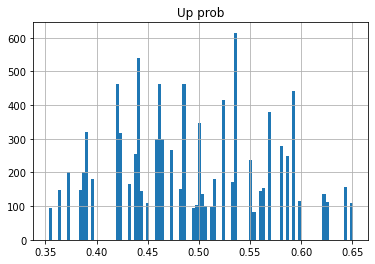

In [464]:
backtest.hist(column='Up prob', bins=100)

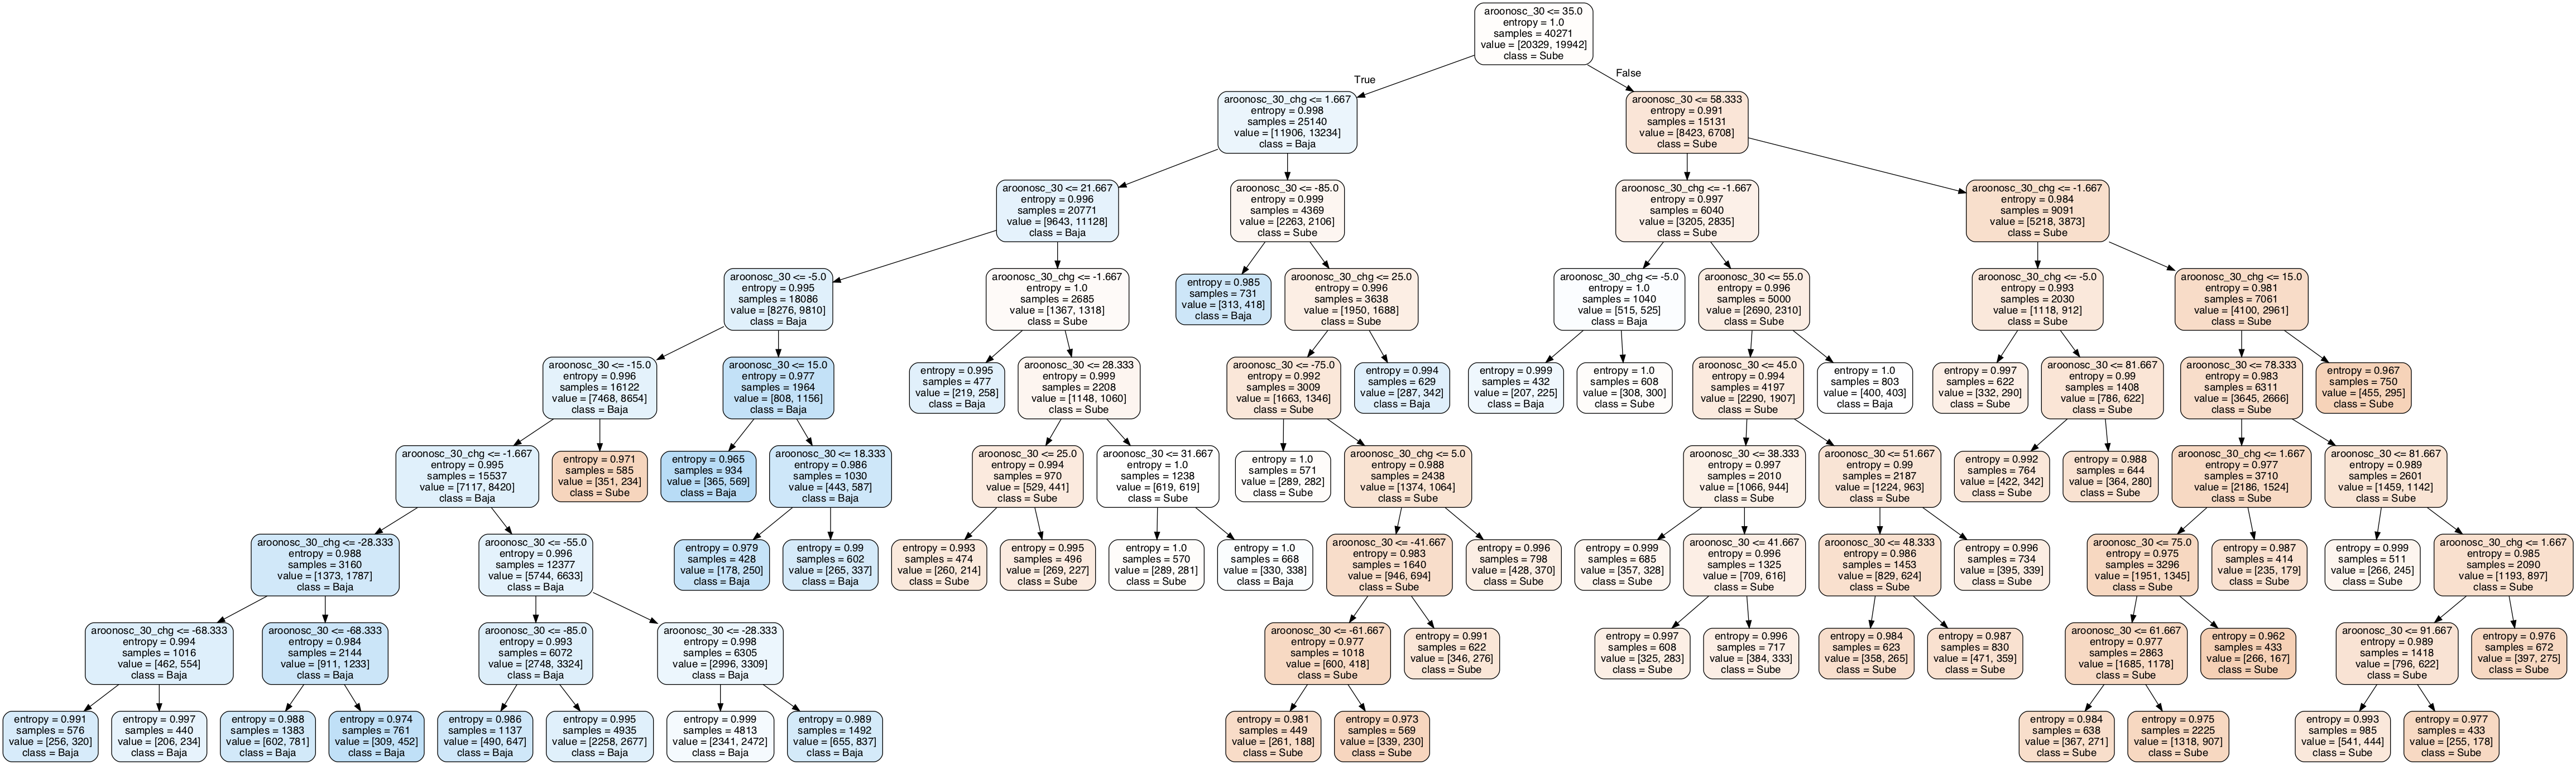

In [278]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

targets = ['Sube','Baja']

dot_data = tree.export_graphviz(model, out_file=None, feature_names=indicators_train.columns, 
                                class_names=targets, rounded = True, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data)  

# guardo la imagen en disco
graph.write_png("SMAS.png")

# imprimo en pantalla
Image(graph.create_png())

In [279]:
# Reviso la entropia de los nodos hoja

n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
n_node_samples = model.tree_.n_node_samples
impurity = model.tree_.impurity

weighted_entropy = 0

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

for i in range(n_nodes):
    if is_leaves[i]:
        weighted_entropy += impurity[i] * n_node_samples[i] 

print('Entropia promedio:', round(weighted_entropy/n_node_samples[0], 3))

Entropia promedio: 0.99


# 6. Resultados